In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
# Load stopwords once
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import pickle as pk


In [84]:
data=pd.read_csv('IMDB Dataset.csv')


In [85]:
print(data['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [86]:
# Checking for any duplicate records or missing values
data.dropna(inplace=True) 

In [87]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [88]:
# Data cleanup
def clean_review(review):
    str=' '.join(word for word in review.split() if word.lower() not in stop_words)
    return str

In [89]:
# data['review']=data['review'].apply(clean_review)
# print(data['review'])

In [90]:
# Wordcloud
from wordcloud import WordCloud

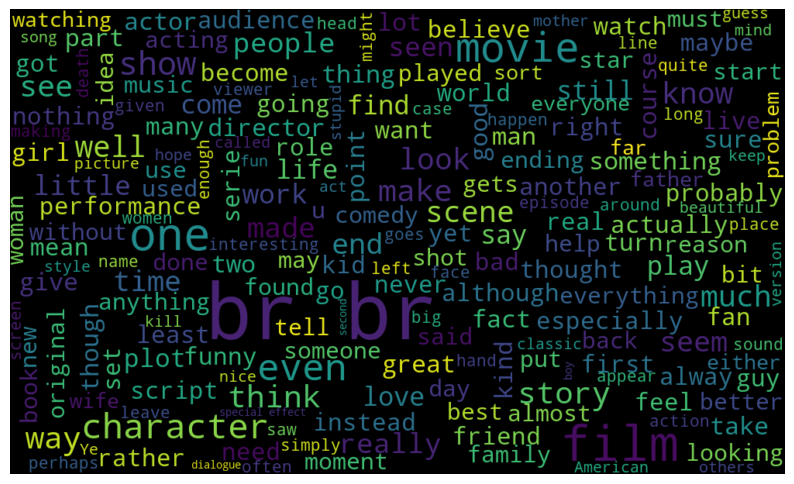

In [91]:
# drawing an word cloud
cleaned_reviews=[clean_review(review) for review in data['review']]
filtered_reviews = [review for review in cleaned_reviews if review.strip()]
# Combine into a single string
combined_reviews = ' '.join(filtered_reviews)
# Generate word cloud
if combined_reviews.strip():  # Ensure there is content
    wordcloud = WordCloud(height=600, width=1000, max_font_size=100).generate(combined_reviews)

    # Display the word cloud
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("Not enough content to generate a word cloud.")
# wordcloud=WordCloud(height=600, width=1000, max_font_size=100)
# plt.figure(figsize=(15,12))
# plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
# plt.axis('off')
# plt.show()

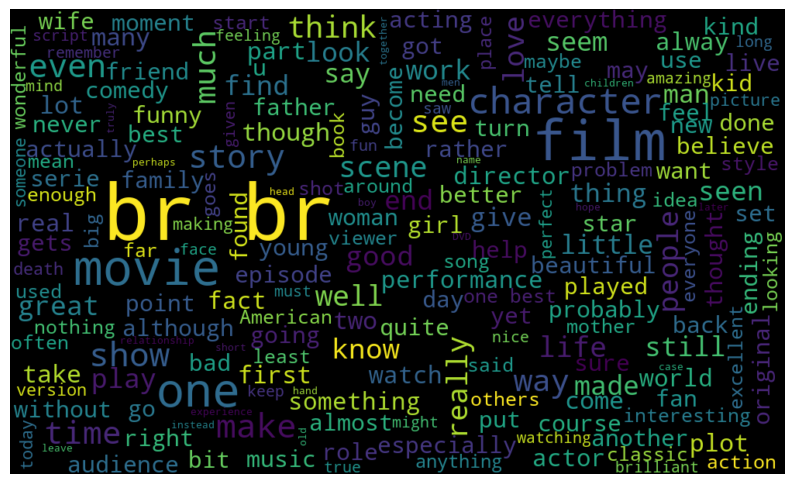

In [92]:
# Filter positive reviews
positive_reviews = data[data['sentiment'] == 'positive']['review']

cleaned_reviews=[clean_review(review) for review in positive_reviews]
filtered_reviews = [review for review in cleaned_reviews if review.strip()]
# Combine into a single string
combined_reviews = ' '.join(filtered_reviews)

# Generate word cloud
if combined_reviews.strip():  # Ensure there is content
    wordcloud = WordCloud(height=600, width=1000, max_font_size=100).generate(combined_reviews)

    # Display the word cloud
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("Not enough content to generate a word cloud.")

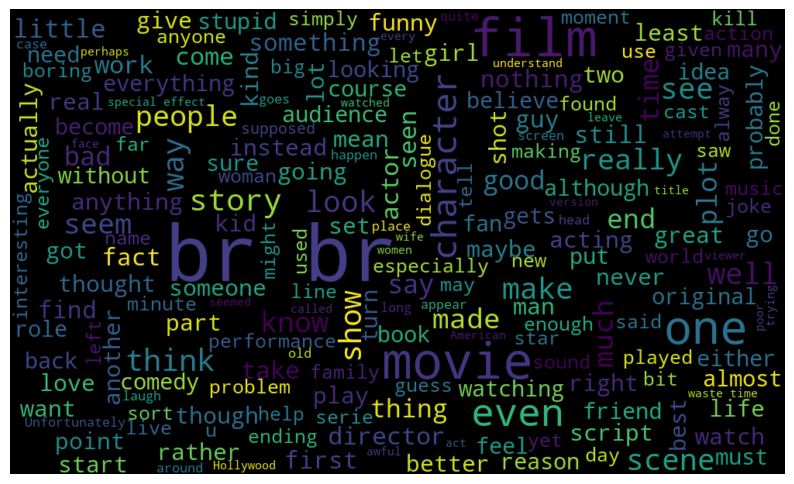

In [93]:
# Filter for negetive reviews
negative_reviews = data[data['sentiment'] == 'negative']['review']

cleaned_reviews=[clean_review(review) for review in negative_reviews]
filtered_reviews = [review for review in cleaned_reviews if review.strip()]
# Combine into a single string
combined_reviews = ' '.join(filtered_reviews)

# Generate word cloud
if combined_reviews.strip():  # Ensure there is content
    wordcloud = WordCloud(height=600, width=1000, max_font_size=100).generate(combined_reviews)

    # Display the word cloud
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("Not enough content to generate a word cloud.")

In [94]:
cv=TfidfVectorizer(max_features=2500)

In [95]:
reviews=cv.fit_transform(data['review'])


In [96]:
data['sentiment']=data['sentiment'].replace(['positive', 'negative'],[1,0])

C:\Users\ACER\AppData\Local\Temp\ipykernel_2392\1617047309.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment']=data['sentiment'].replace(['positive', 'negative'],[1,0])


In [97]:
data['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [98]:
model=LogisticRegression()

In [99]:
# DATA splitting
reviews_train, reviews_test, sent_train, sent_test=train_test_split(reviews, data['sentiment'], test_size=0.2)

In [100]:
model.fit(reviews_train, sent_train)

LogisticRegression()

In [101]:
predict=model.predict(reviews_test)

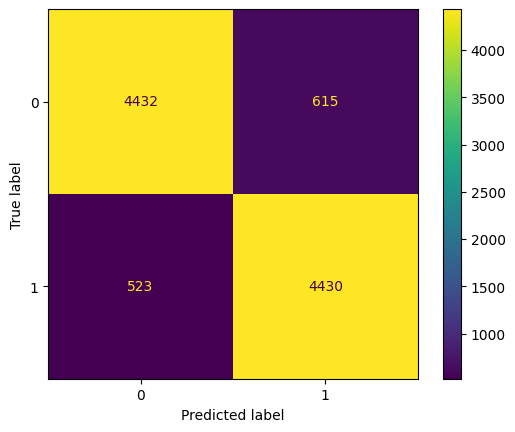

In [102]:
# confusion metrices
cm=confusion_matrix(sent_test, predict, labels=model.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
# plt.figure(figsize={10,10})
display.plot()
plt.show()

In [103]:
# loading our model
pk.dump(model,open('model.pkl','wb'))
pk.dump(cv,open('scaler.pkl','wb'))